In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD

In [171]:
data1 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/2021/kmeans/class_2.csv")
data1

,FID,0cc21,13cc21,25cc21,35cc21,41cc21,49cc21,55cc21,62cc21,69cc21,...,77eg21,84eg21,91eg21,97eg21,106eg21,111eg21,116eg21,124eg21,yield,labels
0,12,0.0,0.014704,6.355738,13.032160,16.401757,29.460797,43.006249,47.915170,60.149126,...,0.164030,0.169512,0.178180,0.192914,0.224715,0.206845,0.238216,0.013648,41.36,2
1,13,0.0,0.012254,4.018290,9.958238,15.798820,27.274988,41.634886,47.400177,59.655540,...,0.160929,0.177448,0.186905,0.206960,0.228041,0.218124,0.242028,0.017155,41.55,2
2,14,0.0,0.022669,7.944628,16.535284,20.891565,32.959426,47.629325,54.799003,65.689377,...,0.186107,0.199130,0.203682,0.223230,0.223758,0.206758,0.219189,0.012015,40.02,2
3,15,0.0,0.017155,5.811919,12.875996,18.045815,27.414521,41.010268,46.541180,56.152060,...,0.150331,0.159679,0.177258,0.205468,0.204442,0.199961,0.220815,0.017756,41.30,2
4,16,0.0,0.000000,5.973480,13.567444,19.340145,28.330583,41.601585,47.635589,56.457857,...,0.151831,0.163072,0.184434,0.203875,0.206436,0.211270,0.230703,0.018370,37.56,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3667,0.0,0.007965,3.874832,6.994056,13.697912,30.177874,43.187319,51.528835,68.850480,...,0.200292,0.200306,0.207290,0.204714,0.198449,0.203060,0.212519,0.021124,53.87,2
266,3708,0.0,0.108445,8.217040,12.196921,16.168877,32.884200,44.462168,60.174224,69.955190,...,0.187626,0.176724,0.196348,0.185566,0.177711,0.170685,0.161648,0.020155,31.62,2
267,3709,0.0,0.061269,6.877521,11.232743,16.220698,32.817467,45.049840,57.575355,69.465021,...,0.179611,0.176742,0.196241,0.186803,0.172404,0.174069,0.160808,0.014409,35.74,2
268,3710,0.0,0.042888,7.645176,11.497638,17.291249,34.296661,47.572424,55.501023,72.353013,...,0.189168,0.188216,0.202344,0.196513,0.179438,0.186018,0.177371,0.017234,31.33,2


In [172]:
data1 = data1.drop('labels',axis=1)
data1

,FID,0cc21,13cc21,25cc21,35cc21,41cc21,49cc21,55cc21,62cc21,69cc21,...,69eg21,77eg21,84eg21,91eg21,97eg21,106eg21,111eg21,116eg21,124eg21,yield
0,12,0.0,0.014704,6.355738,13.032160,16.401757,29.460797,43.006249,47.915170,60.149126,...,0.184389,0.164030,0.169512,0.178180,0.192914,0.224715,0.206845,0.238216,0.013648,41.36
1,13,0.0,0.012254,4.018290,9.958238,15.798820,27.274988,41.634886,47.400177,59.655540,...,0.169004,0.160929,0.177448,0.186905,0.206960,0.228041,0.218124,0.242028,0.017155,41.55
2,14,0.0,0.022669,7.944628,16.535284,20.891565,32.959426,47.629325,54.799003,65.689377,...,0.207893,0.186107,0.199130,0.203682,0.223230,0.223758,0.206758,0.219189,0.012015,40.02
3,15,0.0,0.017155,5.811919,12.875996,18.045815,27.414521,41.010268,46.541180,56.152060,...,0.165878,0.150331,0.159679,0.177258,0.205468,0.204442,0.199961,0.220815,0.017756,41.30
4,16,0.0,0.000000,5.973480,13.567444,19.340145,28.330583,41.601585,47.635589,56.457857,...,0.164428,0.151831,0.163072,0.184434,0.203875,0.206436,0.211270,0.230703,0.018370,37.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3667,0.0,0.007965,3.874832,6.994056,13.697912,30.177874,43.187319,51.528835,68.850480,...,0.213880,0.200292,0.200306,0.207290,0.204714,0.198449,0.203060,0.212519,0.021124,53.87
266,3708,0.0,0.108445,8.217040,12.196921,16.168877,32.884200,44.462168,60.174224,69.955190,...,0.186992,0.187626,0.176724,0.196348,0.185566,0.177711,0.170685,0.161648,0.020155,31.62
267,3709,0.0,0.061269,6.877521,11.232743,16.220698,32.817467,45.049840,57.575355,69.465021,...,0.191115,0.179611,0.176742,0.196241,0.186803,0.172404,0.174069,0.160808,0.014409,35.74
268,3710,0.0,0.042888,7.645176,11.497638,17.291249,34.296661,47.572424,55.501023,72.353013,...,0.200048,0.189168,0.188216,0.202344,0.196513,0.179438,0.186018,0.177371,0.017234,31.33


In [173]:
data1 = data1.T

In [174]:
data1 = data1.iloc[1:,:]
data1

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0cc21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000613,0.000000,0.000000,0.000000,...,0.000000,0.000613,0.000613,0.001838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13cc21,0.014704,0.012254,0.022669,0.017155,0.000000,0.039212,0.022057,0.009190,0.001838,0.022669,...,0.000000,0.034923,0.023282,0.100480,0.017155,0.007965,0.108445,0.061269,0.042888,0.466253
25cc21,6.355738,4.018290,7.944628,5.811919,5.973480,6.436255,6.565463,4.091449,3.255103,4.408474,...,0.759640,1.489407,7.837220,6.918470,5.310776,3.874832,8.217040,6.877521,7.645176,7.714216
35cc21,13.032160,9.958238,16.535284,12.875996,13.567444,14.833714,13.309556,9.472724,8.237159,9.494894,...,2.639232,6.014109,13.334553,12.219790,8.603567,6.994056,12.196921,11.232743,11.497638,11.531779
41cc21,16.401757,15.798820,20.891565,18.045815,19.340145,18.834763,17.658764,12.942894,12.391291,11.711034,...,7.372742,12.364579,21.425531,18.381344,14.998933,13.697912,16.168877,16.220698,17.291249,15.891480
49cc21,29.460797,27.274988,32.959426,27.414521,28.330583,29.973428,27.004417,21.806523,21.524424,20.562549,...,20.425757,25.409498,42.914776,39.177121,30.850664,30.177874,32.884200,32.817467,34.296661,32.844160
55cc21,43.006249,41.634886,47.629325,41.010268,41.601585,43.065029,39.818930,32.150104,31.765280,29.860042,...,29.911294,28.579636,57.907957,52.851118,44.621073,43.187319,44.462168,45.049840,47.572424,47.312676
62cc21,47.915170,47.400177,54.799003,46.541180,47.635589,49.922426,45.216089,36.764261,37.900621,35.578241,...,42.760294,40.335891,61.443822,60.450108,53.746174,51.528835,60.174224,57.575355,55.501023,57.561470
69cc21,60.149126,59.655540,65.689377,56.152060,56.457857,60.136565,55.267795,45.136903,45.284560,44.645633,...,61.875688,53.887517,74.912971,73.196769,68.220088,68.850480,69.955190,69.465021,72.353013,73.614388
77cc21,73.945714,75.421661,83.309863,70.048912,68.916958,74.219833,69.756517,55.122816,56.871809,54.344531,...,77.179253,69.986563,85.889815,84.889008,76.192421,81.797366,77.050255,75.499059,78.380005,80.136522


In [175]:
data1['average'] = data1.iloc[:,:].mean(axis=1)

In [176]:
data1

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,average
0cc21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000613,0.000000,0.000000,0.000000,...,0.000613,0.000613,0.001838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001940
13cc21,0.014704,0.012254,0.022669,0.017155,0.000000,0.039212,0.022057,0.009190,0.001838,0.022669,...,0.034923,0.023282,0.100480,0.017155,0.007965,0.108445,0.061269,0.042888,0.466253,0.027370
25cc21,6.355738,4.018290,7.944628,5.811919,5.973480,6.436255,6.565463,4.091449,3.255103,4.408474,...,1.489407,7.837220,6.918470,5.310776,3.874832,8.217040,6.877521,7.645176,7.714216,3.151707
35cc21,13.032160,9.958238,16.535284,12.875996,13.567444,14.833714,13.309556,9.472724,8.237159,9.494894,...,6.014109,13.334553,12.219790,8.603567,6.994056,12.196921,11.232743,11.497638,11.531779,6.531500
41cc21,16.401757,15.798820,20.891565,18.045815,19.340145,18.834763,17.658764,12.942894,12.391291,11.711034,...,12.364579,21.425531,18.381344,14.998933,13.697912,16.168877,16.220698,17.291249,15.891480,13.369153
49cc21,29.460797,27.274988,32.959426,27.414521,28.330583,29.973428,27.004417,21.806523,21.524424,20.562549,...,25.409498,42.914776,39.177121,30.850664,30.177874,32.884200,32.817467,34.296661,32.844160,27.663232
55cc21,43.006249,41.634886,47.629325,41.010268,41.601585,43.065029,39.818930,32.150104,31.765280,29.860042,...,28.579636,57.907957,52.851118,44.621073,43.187319,44.462168,45.049840,47.572424,47.312676,40.665564
62cc21,47.915170,47.400177,54.799003,46.541180,47.635589,49.922426,45.216089,36.764261,37.900621,35.578241,...,40.335891,61.443822,60.450108,53.746174,51.528835,60.174224,57.575355,55.501023,57.561470,51.251268
69cc21,60.149126,59.655540,65.689377,56.152060,56.457857,60.136565,55.267795,45.136903,45.284560,44.645633,...,53.887517,74.912971,73.196769,68.220088,68.850480,69.955190,69.465021,72.353013,73.614388,63.864507
77cc21,73.945714,75.421661,83.309863,70.048912,68.916958,74.219833,69.756517,55.122816,56.871809,54.344531,...,69.986563,85.889815,84.889008,76.192421,81.797366,77.050255,75.499059,78.380005,80.136522,74.960535


In [177]:
data1 = data1[17:34]

In [178]:
data1

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,average
0ch21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13ch21,0.007270,0.007046,0.006725,0.006697,0.006825,0.004971,0.004255,0.004844,0.004193,0.005967,...,0.008845,0.006423,0.007491,0.006724,0.007832,0.005516,0.005415,0.004882,0.006241,0.007429
25ch21,0.019610,0.018453,0.023717,0.022663,0.020852,0.021074,0.021032,0.017506,0.017015,0.017664,...,0.016891,0.013842,0.010444,0.005571,0.005740,0.012703,0.004982,0.013971,0.025585,0.011132
35ch21,0.018713,0.016753,0.024419,0.021028,0.018634,0.024434,0.021395,0.018347,0.014315,0.020620,...,0.009712,0.015954,0.012881,0.008541,0.008704,0.003218,0.007193,0.011161,0.068546,0.009893
41ch21,0.033815,0.025928,0.043525,0.040082,0.040027,0.037532,0.035368,0.028241,0.019612,0.020712,...,0.020224,0.038382,0.037292,0.027210,0.024096,0.024001,0.030018,0.033514,0.042770,0.027676
49ch21,0.097063,0.082486,0.112109,0.089431,0.097196,0.105043,0.102767,0.088908,0.084848,0.097117,...,0.049312,0.119839,0.140066,0.104999,0.097834,0.177996,0.176088,0.180635,0.190751,0.091246
55ch21,0.161502,0.152117,0.200602,0.141365,0.141082,0.145709,0.146396,0.127555,0.116790,0.136375,...,0.095643,0.271098,0.228648,0.170941,0.156991,0.239549,0.235692,0.245441,0.248046,0.156967
62ch21,0.205795,0.188911,0.223782,0.185916,0.192098,0.191362,0.192667,0.168110,0.180455,0.214005,...,0.162749,0.271985,0.326446,0.302106,0.256275,0.392413,0.408860,0.421311,0.428269,0.217099
69ch21,0.244362,0.230802,0.289029,0.218220,0.223286,0.224695,0.222613,0.201892,0.215241,0.245223,...,0.216214,0.308209,0.376047,0.372631,0.341777,0.441433,0.447177,0.449576,0.447223,0.285271
77ch21,0.351391,0.316541,0.438104,0.319508,0.293257,0.307690,0.292814,0.235428,0.246710,0.270854,...,0.297086,0.459102,0.492895,0.509472,0.478536,0.555186,0.581879,0.598959,0.587184,0.372830


In [179]:
data1['average_ch'] = data1['average']

C:\Users\samba\.conda\envs\env2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
data1

,0,1,2,3,4,5,6,7,8,9,...,262,263,264,265,266,267,268,269,average,average_ch
0ch21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13ch21,0.007270,0.007046,0.006725,0.006697,0.006825,0.004971,0.004255,0.004844,0.004193,0.005967,...,0.006423,0.007491,0.006724,0.007832,0.005516,0.005415,0.004882,0.006241,0.007429,0.007429
25ch21,0.019610,0.018453,0.023717,0.022663,0.020852,0.021074,0.021032,0.017506,0.017015,0.017664,...,0.013842,0.010444,0.005571,0.005740,0.012703,0.004982,0.013971,0.025585,0.011132,0.011132
35ch21,0.018713,0.016753,0.024419,0.021028,0.018634,0.024434,0.021395,0.018347,0.014315,0.020620,...,0.015954,0.012881,0.008541,0.008704,0.003218,0.007193,0.011161,0.068546,0.009893,0.009893
41ch21,0.033815,0.025928,0.043525,0.040082,0.040027,0.037532,0.035368,0.028241,0.019612,0.020712,...,0.038382,0.037292,0.027210,0.024096,0.024001,0.030018,0.033514,0.042770,0.027676,0.027676
49ch21,0.097063,0.082486,0.112109,0.089431,0.097196,0.105043,0.102767,0.088908,0.084848,0.097117,...,0.119839,0.140066,0.104999,0.097834,0.177996,0.176088,0.180635,0.190751,0.091246,0.091246
55ch21,0.161502,0.152117,0.200602,0.141365,0.141082,0.145709,0.146396,0.127555,0.116790,0.136375,...,0.271098,0.228648,0.170941,0.156991,0.239549,0.235692,0.245441,0.248046,0.156967,0.156967
62ch21,0.205795,0.188911,0.223782,0.185916,0.192098,0.191362,0.192667,0.168110,0.180455,0.214005,...,0.271985,0.326446,0.302106,0.256275,0.392413,0.408860,0.421311,0.428269,0.217099,0.217099
69ch21,0.244362,0.230802,0.289029,0.218220,0.223286,0.224695,0.222613,0.201892,0.215241,0.245223,...,0.308209,0.376047,0.372631,0.341777,0.441433,0.447177,0.449576,0.447223,0.285271,0.285271
77ch21,0.351391,0.316541,0.438104,0.319508,0.293257,0.307690,0.292814,0.235428,0.246710,0.270854,...,0.459102,0.492895,0.509472,0.478536,0.555186,0.581879,0.598959,0.587184,0.372830,0.372830


In [181]:
data2 = data1['average_ch']

In [182]:
data2

0ch21      0.000000
13ch21     0.007429
25ch21     0.011132
35ch21     0.009893
41ch21     0.027676
49ch21     0.091246
55ch21     0.156967
62ch21     0.217099
69ch21     0.285271
77ch21     0.372830
84ch21     0.376449
91ch21     0.423164
97ch21     0.490570
106ch21    0.511429
111ch21    0.596048
116ch21    0.462199
124ch21    0.623437
Name: average_ch, dtype: float64

In [183]:
data2 = pd.DataFrame(data2)

In [184]:
dataset_train = data2[0:13]
dataset_test = data2[13:16]

In [185]:
training_set = data2.iloc[0:13,:].values
training_set

array([[0.        ],
       [0.00742925],
       [0.01113227],
       [0.00989315],
       [0.02767642],
       [0.09124567],
       [0.15696651],
       [0.21709877],
       [0.28527131],
       [0.37283036],
       [0.37644886],
       [0.42316416],
       [0.49056988]])

In [186]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [187]:
X_train = []
y_train = []
for i in range(1, 12):
    X_train.append(training_set_scaled[i-1:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [188]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [189]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=50,batch_size=8)

Epoch 1/50
2/2 [==============================] - 4s 14ms/step - loss: 0.2347
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 0.2293
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 0.2240
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 0.2189
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 0.2133
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 0.2073
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 0.2012
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1959
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1889
Epoch 10/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1813
Epoch 11/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1759
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1687
Epoch 13/50
2/2 [==============================] - 0s 4ms/step - loss: 0

In [190]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 1, 50)             10400     
                                                                 
 dropout_28 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_29 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_29 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_30 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_30 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_31 (LSTM)              (None, 50)               

In [191]:
real_average_ch = data2.iloc[13:17,:].values

In [192]:
real_average_ch

array([[0.51142905],
       [0.59604772],
       [0.46219899],
       [0.62343689]])

In [193]:
dataset_total = pd.concat((dataset_train['average_ch'], dataset_test['average_ch']), axis = 0)

In [194]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values

In [195]:
inputs = inputs.reshape(-1,1)

In [196]:
inputs = sc.transform(inputs)

In [197]:
X_test = []
for i in range(1, 5):
    X_test.append(inputs[i-1:i, 0])

In [198]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_average_ch = model.predict(X_test)
predicted_average_ch = sc.inverse_transform(predicted_average_ch)

1/1 [==============================] - 1s 912ms/step


In [199]:
predicted_average_ch

array([[0.49672073],
       [0.5227527 ],
       [0.6349603 ],
       [0.4624312 ]], dtype=float32)

In [200]:
real_average_ch

array([[0.51142905],
       [0.59604772],
       [0.46219899],
       [0.62343689]])

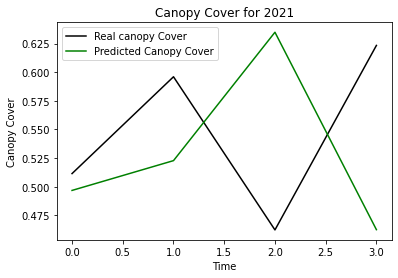

In [201]:
plt.plot(real_average_ch, color = 'black', label = 'Real canopy Cover')
plt.plot(predicted_average_ch, color = 'green', label = 'Predicted Canopy Cover')
plt.title('Canopy Cover for 2021')
plt.xlabel('Time')
plt.ylabel('Canopy Cover')
plt.legend()
plt.show()

In [206]:
#GRU Implementation
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=8)

Epoch 1/50
2/2 [==============================] - 4s 12ms/step - loss: 0.2354
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 0.2020
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1618
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1211
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1069
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1131
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1063
Epoch 8/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1192
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1185
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1089
Epoch 11/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1047
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1104
Epoch 13/50
2/2 [==============================] - 0s 4ms/step - loss: 0

In [207]:
regressorGRU.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 1, 50)             7950      
                                                                 
 dropout_36 (Dropout)        (None, 1, 50)             0         
                                                                 
 gru_5 (GRU)                 (None, 1, 50)             15300     
                                                                 
 dropout_37 (Dropout)        (None, 1, 50)             0         
                                                                 
 gru_6 (GRU)                 (None, 1, 50)             15300     
                                                                 
 dropout_38 (Dropout)        (None, 1, 50)             0         
                                                                 
 gru_7 (GRU)                 (None, 50)               

In [208]:
real_average_ch = data2.iloc[13:17,:].values
real_average_ch

array([[0.51142905],
       [0.59604772],
       [0.46219899],
       [0.62343689]])

In [209]:
dataset_total = pd.concat((dataset_train['average_ch'], dataset_test['average_ch']), axis = 0)

In [210]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values

In [211]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [212]:
X_test = []
for i in range(1, 5):
    X_test.append(inputs[i-1:i, 0])

In [213]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_average_ch = regressorGRU.predict(X_test)
predicted_average_ch = sc.inverse_transform(predicted_average_ch)

1/1 [==============================] - 1s 809ms/step


In [214]:
predicted_average_ch

array([[0.20612475],
       [0.20627813],
       [0.20689481],
       [0.20591535]], dtype=float32)